In [43]:
# Working of an Artificial Neural Network (ANN) with Keras
# Import Libraries
# Load and Preprocess Data
# Build the ANN Model
# Compile and Train the Model
# Evaluate the Model
# Make Predictions

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
12/12 [==============================] - 2s 39ms/step - loss: 1.0491 - accuracy: 0.5833 - val_loss: 1.0061 - val_accuracy: 0.7500
Epoch 2/50
12/12 [==============================] - 0s 9ms/step - loss: 0.9427 - accuracy: 0.7708 - val_loss: 0.8922 - val_accuracy: 0.9167
Epoch 3/50
12/12 [==============================] - 0s 13ms/step - loss: 0.8191 - accuracy: 0.8021 - val_loss: 0.7574 - val_accuracy: 0.8750
Epoch 4/50
12/12 [==============================] - 0s 11ms/step - loss: 0.6715 - accuracy: 0.8125 - val_loss: 0.6032 - val_accuracy: 0.9167
Epoch 5/50
12/12 [==============================] - 0s 8ms/step - loss: 0.5175 - accuracy: 0.8333 - val_loss: 0.4609 - val_accuracy: 0.9167
Epoch 6/50
12/12 [==============================] - 0s 11ms/step - loss: 0.4047 - accuracy: 0.8438 - val_loss: 0.3744 - val_accuracy: 0.9167
Epoch 7/50
12/12 [==============================] - 0s 9ms/step - loss: 0.3321 - accuracy: 0.8750 - val_loss: 0.3137 - val_accuracy: 0.9167
Epoch 8/50
12/12

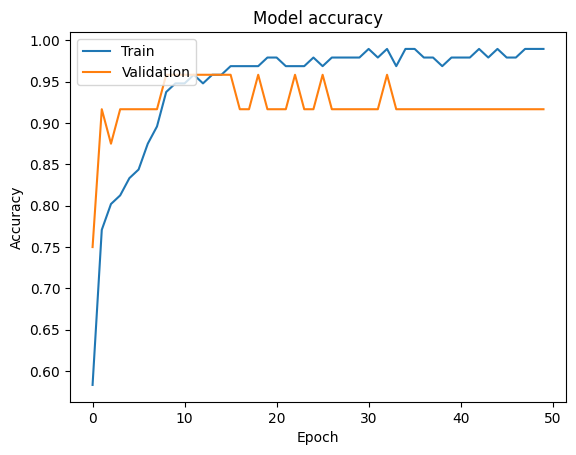

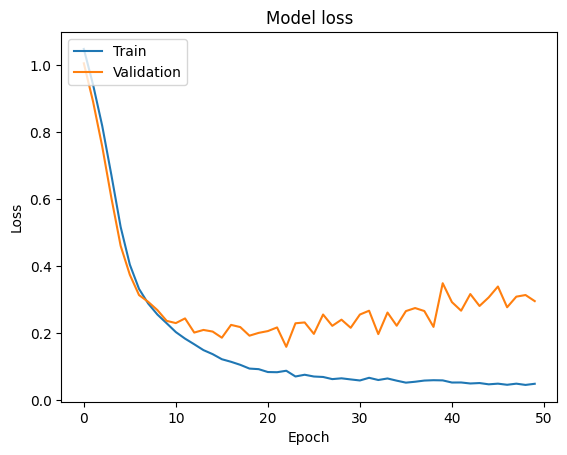

In [44]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Step 2: Load and Preprocess Data
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# One-hot encode the target labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y.reshape(-1, 1))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Build the ANN Model
# Initialize the model
model = Sequential()

# Add an input layer and the first hidden layer
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))

# Add additional hidden layers
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Add the output layer
model.add(Dense(y.shape[1], activation='softmax'))

# Step 4: Compile the Model
# Compile the model with an optimizer, loss function, and metrics
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the Model
# Train the model on the training data
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=8,
                    validation_split=0.2)

# Step 6: Evaluate the Model
# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')

# Step 7: Make Predictions
# Predict on the test data
predictions = model.predict(X_test)

# Displaying the first prediction and the corresponding label
print("First prediction (probabilities):", predictions[0])
print("Predicted class:", np.argmax(predictions[0]))
print("True class:", np.argmax(y_test[0]))

# Visualize the training history
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
